In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_validate,cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
# from xgboost import XGBRegressor
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [3]:
data = pd.read_csv('customer_feedback_satisfaction.csv')

In [4]:
data.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


In [5]:
data.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Country              0
Income               0
ProductQuality       0
ServiceQuality       0
PurchaseFrequency    0
FeedbackScore        0
LoyaltyLevel         0
SatisfactionScore    0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         38444 non-null  int64  
 1   Age                38444 non-null  int64  
 2   Gender             38444 non-null  object 
 3   Country            38444 non-null  object 
 4   Income             38444 non-null  int64  
 5   ProductQuality     38444 non-null  int64  
 6   ServiceQuality     38444 non-null  int64  
 7   PurchaseFrequency  38444 non-null  int64  
 8   FeedbackScore      38444 non-null  object 
 9   LoyaltyLevel       38444 non-null  object 
 10  SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.2+ MB


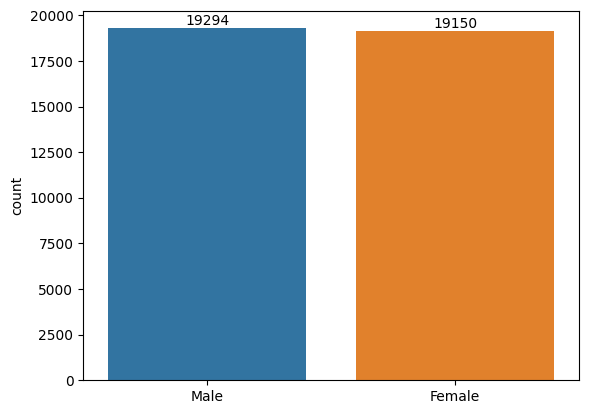

In [10]:
val = data['Gender'].value_counts()
sns.barplot(x = data['Gender'].unique() , y = data['Gender'].value_counts(),hue=data['Gender'].unique())
for index , value in enumerate(val):
    plt.text(index,value,str(value),ha = 'center',va='bottom')
plt.show()

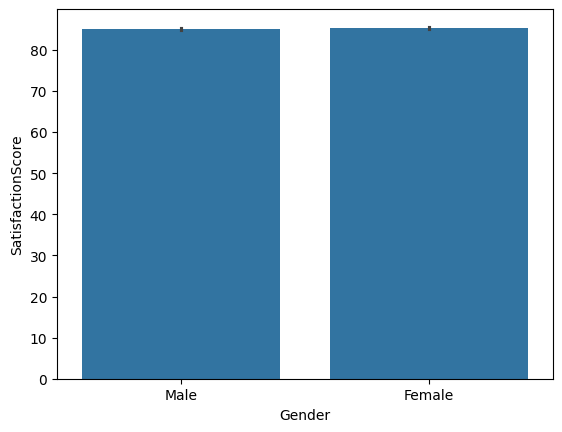

In [12]:
sns.barplot(x=data['Gender'],y=data['SatisfactionScore'])
plt.show()

In [14]:
data['Country'].unique()

array(['UK', 'USA', 'France', 'Germany', 'Canada'], dtype=object)

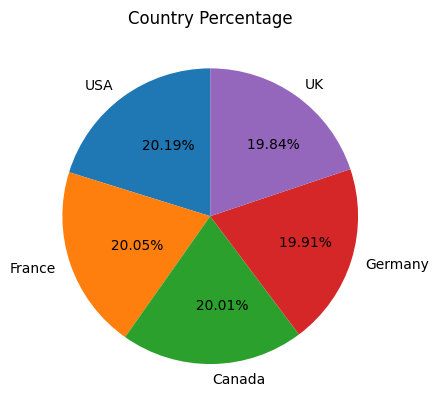

In [15]:
Country_counts = data['Country'].value_counts()
Country_percentage = Country_counts / Country_counts.sum() * 100

plt.pie(Country_percentage, labels=Country_percentage.index, autopct='%10.2f%%', startangle=90)
plt.title("Country Percentage")
plt.show()

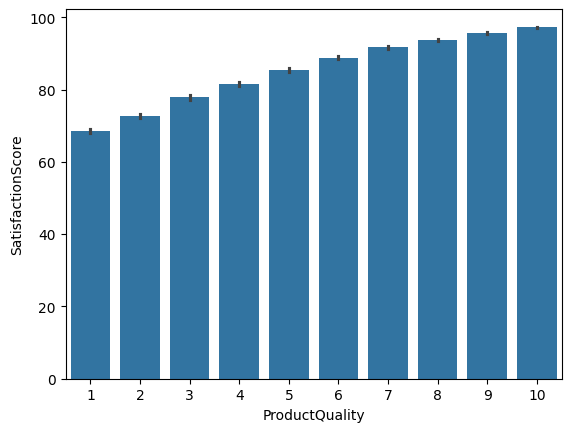

In [17]:
sns.barplot(x=data['ProductQuality'],y=data['SatisfactionScore'])
plt.show()

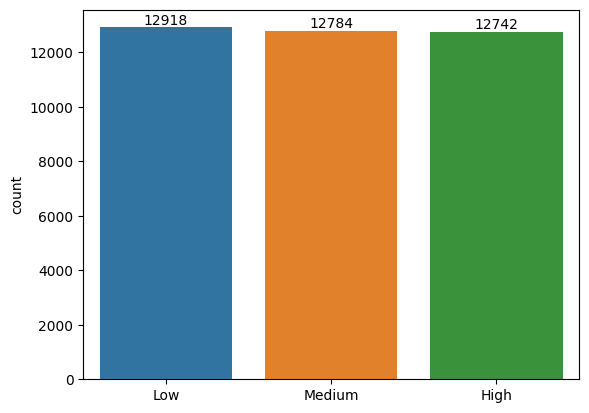

In [19]:
val = data['FeedbackScore'].value_counts()
sns.barplot(x = data['FeedbackScore'].unique() , y = val, hue=data['FeedbackScore'].unique())
for index , value in enumerate(val):
    plt.text(index,value,str(value),ha = 'center', va='bottom')
plt.show()

In [22]:
object = data.select_dtypes(include=['object'])

le = LabelEncoder()
for col in object:
    data[col] = le.fit_transform(data[col])

In [23]:
data.head()

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,1,3,83094,5,8,5,1,0,100.0
1,2,69,1,3,86860,10,2,8,2,1,100.0
2,3,46,0,4,60173,8,10,18,2,2,100.0
3,4,32,0,3,73884,7,10,16,1,1,100.0
4,5,60,1,3,97546,6,4,13,1,0,82.0


In [26]:
data.drop(columns=['CustomerID'], inplace=True)

In [27]:
x = data.drop(columns=['SatisfactionScore'])
y = data['SatisfactionScore']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 7.38
mean_squared_error : 84.88
r2_score : 0.70


In [30]:
model = RandomForestRegressor(n_estimators=150,max_depth= 12, min_samples_leaf= 10, min_samples_split= 8)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 5.52
mean_squared_error : 61.98
r2_score : 0.78
